In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from scipy.stats import linregress

In [44]:
# read in files
file_audio_features = "Data/audio_features.csv"
file_charts = "Data/billboard_hot100_16-21.csv"
audio_features_df = pd.read_csv(file_audio_features)
charts_df = pd.read_csv(file_charts)
#clean up dfs
audio_features_df.rename(columns={"Track": "Title"}, inplace=True)
audio_features_df.drop(columns="Unnamed: 0", inplace=True)
charts_df.drop(columns="Image", inplace=True)


In [45]:
#creates merged dataframe and cleans data
merged = pd.merge(charts_df, audio_features_df, how="left", on=["Title", "Artist"])
merged.drop(merged.loc[merged.Spotify_ID=="not found"].index, inplace = True)
merged.reset_index(inplace=True, drop=True)
#change datatypes to floats
merged[["danceability", "energy", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "key", "loudness", "mode", "duration_ms", "time_signature"]] = \
    merged[["danceability", "energy", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "key", "loudness", "mode", "duration_ms", "time_signature"]].apply(pd.to_numeric)

# separate columns for year, month, and day
merged[["Date"]] = merged[["Date"]].apply(pd.to_datetime)
merged['Year'] = merged['Date'].dt.year
merged['Month'] = merged['Date'].dt.month
merged['Day'] = merged['Date'].dt.day
# makes a list of dataframes that contain only 1 year of data
# years_df_list[0] contains 2016 data. 
# years_df_list[5] contains 2021 data. 
years_df_list = [merged[merged['Year'] == y] for y in merged['Year'].unique()]


In [46]:
# sets up groupby object
groupby_weeks = merged.groupby(by="Date")
weekly_means = groupby_weeks.mean()


# Box Plots

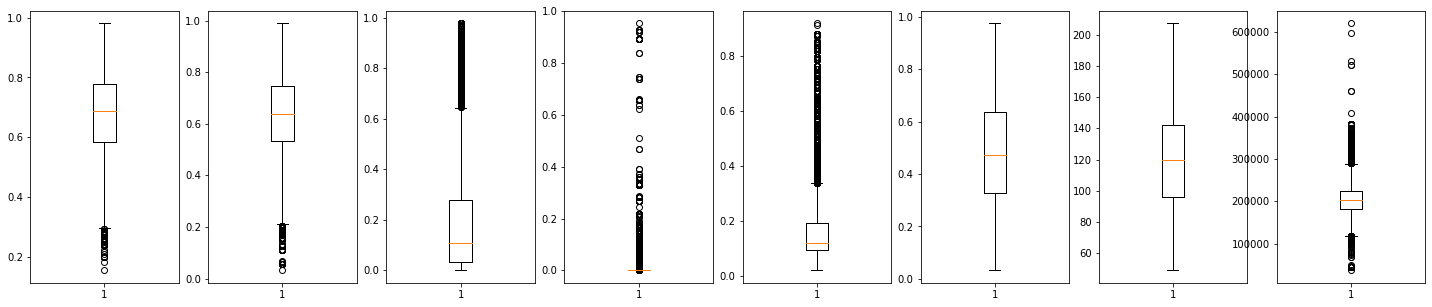

In [47]:
#TODO: spread them out
audio_feature_list = ["danceability", "energy", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]
fig1, ax1 = plt.subplots(1,8)
for i in range(len(audio_feature_list)):
    ax1[i].boxplot(merged[audio_feature_list[i]])
fig1.set_size_inches(25, 5)
    

<function matplotlib.pyplot.show(close=None, block=None)>

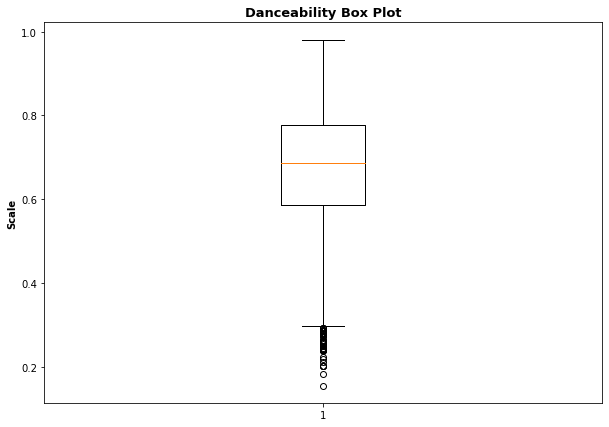

In [48]:
# Individual Box Plots
fig = plt.figure(figsize=(10, 7))
plt.boxplot(merged["danceability"])
plt.title('Danceability Box Plot', weight = 'bold', size = 13)
plt.ylabel("Scale", weight = 'bold')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

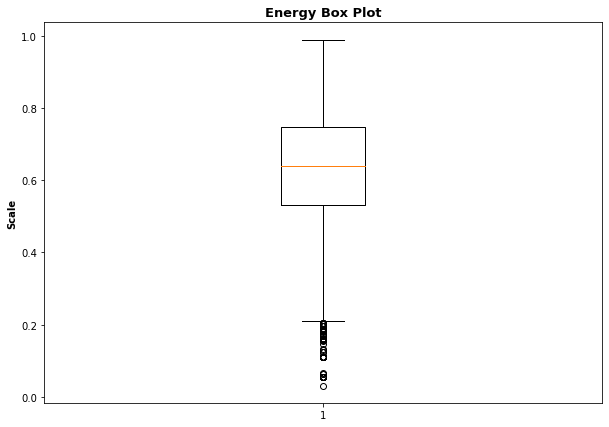

In [49]:
# Individual Box Plots
fig = plt.figure(figsize=(10, 7))
c = "green"
plt.boxplot(merged["energy"])
plt.title('Energy Box Plot', weight = 'bold', size = 13)
plt.ylabel("Scale", weight = 'bold')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

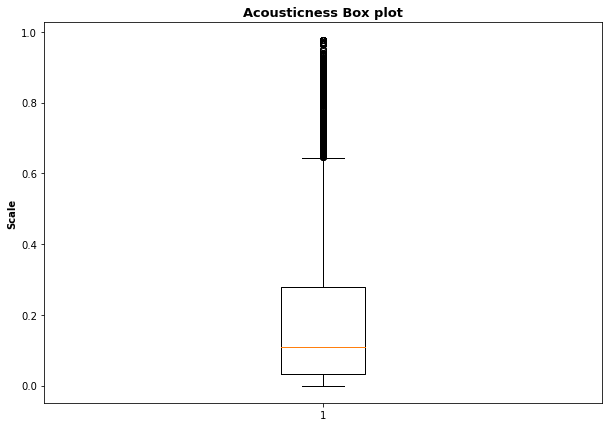

In [50]:
# Individual Box Plots
fig = plt.figure(figsize=(10, 7))
plt.boxplot(merged["acousticness"])
plt.title('Acousticness Box plot', weight = 'bold', size = 13)
plt.ylabel("Scale", weight = 'bold')
plt.show

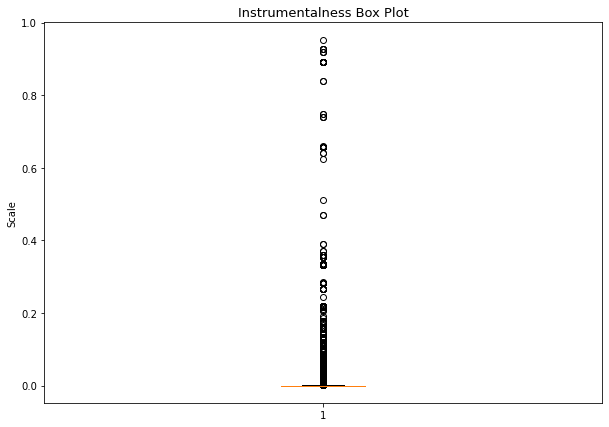

In [51]:
# Individual Box Plots
fig = plt.figure(figsize=(10, 7))
plt.boxplot(merged["instrumentalness"])
plt.title('Instrumentalness Box Plot', size = 13)
plt.ylabel("Scale")
plt.show
plt.savefig("Figures/Instrumentalness.png",dpi=150)

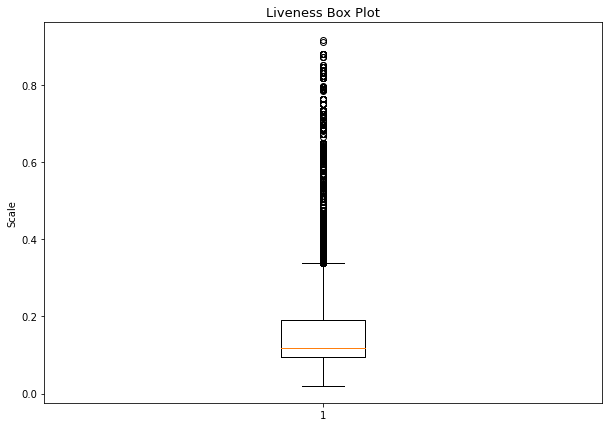

In [52]:
# Individual Box Plots
fig = plt.figure(figsize=(10, 7))
plt.boxplot(merged["liveness"])
plt.title('Liveness Box Plot', size = 13)
plt.ylabel("Scale")
plt.show
plt.savefig("Figures/Liveness.png",dpi=150)

<function matplotlib.pyplot.show(close=None, block=None)>

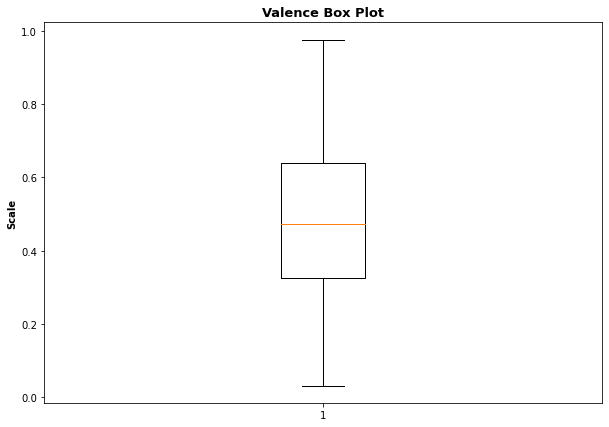

In [53]:
# Individual Box Plots
fig = plt.figure(figsize=(10, 7))
plt.boxplot(merged["valence"])
plt.title('Valence Box Plot', weight = 'bold', size = 13)
plt.ylabel("Scale", weight = 'bold')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

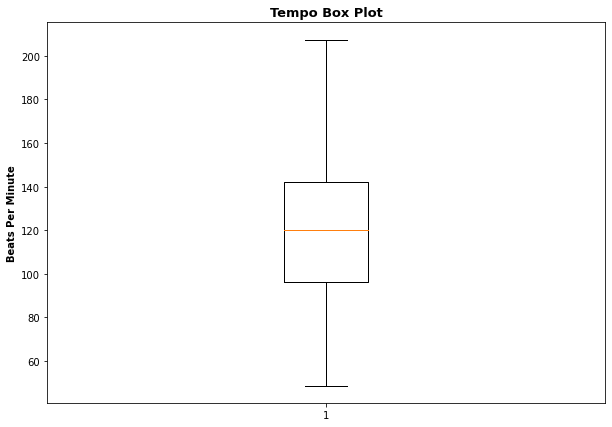

In [54]:
# Individual Box Plots
fig = plt.figure(figsize=(10, 7))
tempo = plt.boxplot(merged["tempo"])
plt.title('Tempo Box Plot', weight = 'bold', size = 13)
plt.ylabel("Beats Per Minute", weight = 'bold')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

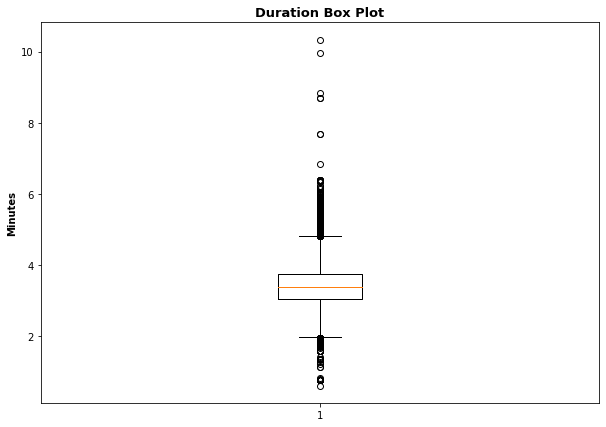

In [55]:
# Individual Box Plots
fig = plt.figure(figsize=(10, 7))
plt.boxplot(merged["duration_ms"]/60000)
plt.title('Duration Box Plot',weight = 'bold', size = 13)
plt.ylabel("Minutes", weight = 'bold')
plt.show

# Audio Features over 5 years

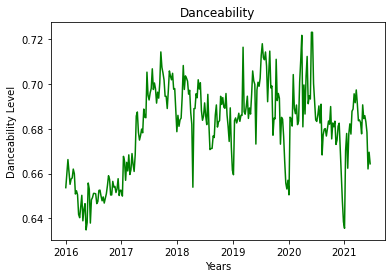

In [56]:
y_axis = weekly_means["danceability"]
dates = weekly_means.index
plt.plot(dates, y_axis,color='green')
plt.title("Danceability")
plt.xlabel("Years")
plt.ylabel("Danceability Level")
plt.savefig("Figures/danceability.png",dpi=150)

Text(0, 0.5, 'Energy Level')

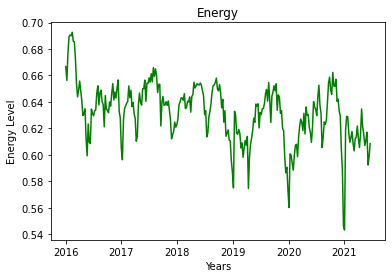

In [57]:
y_axis = weekly_means["energy"]
plt.plot(dates, y_axis,color='green')
plt.title("Energy")
plt.xlabel("Years")
plt.ylabel("Energy Level")

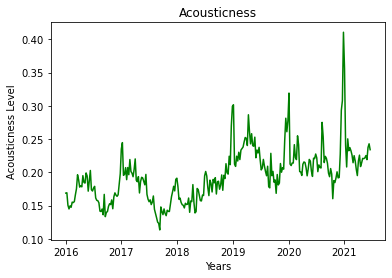

In [58]:
y_axis = weekly_means["acousticness"]
plt.plot(dates, y_axis,color='green')
plt.title("Acousticness")
plt.xlabel("Years")
plt.ylabel("Acousticness Level")
plt.savefig("Figures/Acousticness.png",dpi=150)

Text(0, 0.5, 'Instrumentalness Level')

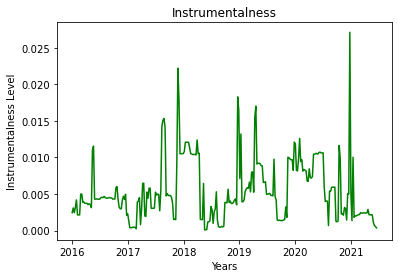

In [59]:
y_axis = weekly_means["instrumentalness"]
plt.plot(dates, y_axis,color='green')
plt.title("Instrumentalness")
plt.xlabel("Years")
plt.ylabel("Instrumentalness Level")

Text(0, 0.5, 'Liveness Level')

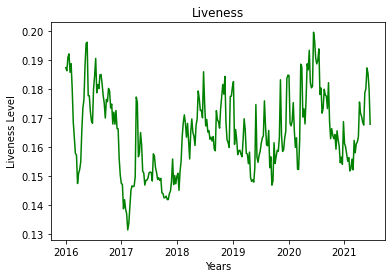

In [60]:
y_axis = weekly_means["liveness"]
plt.plot(dates, y_axis,color='green')
plt.title("Liveness")
plt.xlabel("Years")
plt.ylabel("Liveness Level")

Text(0, 0.5, 'Valence Level')

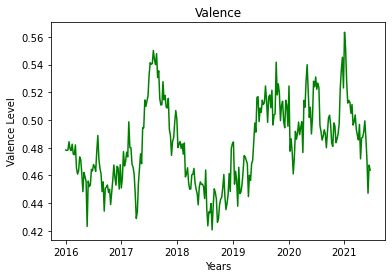

In [61]:
y_axis = weekly_means["valence"]
plt.plot(dates, y_axis,color='green')
plt.title("Valence")
plt.xlabel("Years")
plt.ylabel("Valence Level")

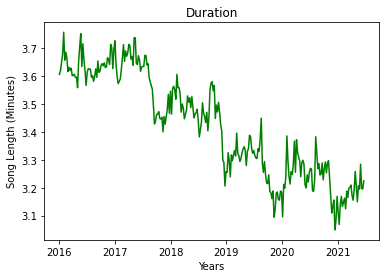

In [20]:

y_axis = weekly_means["duration_ms"]/60000
plt.plot(dates, y_axis,color='green')
plt.title("Duration")
plt.xlabel("Years")
plt.ylabel("Song Length (Minutes)")
plt.savefig("Figures/Duration.png",dpi=150)

<Figure size 2160x2160 with 0 Axes>

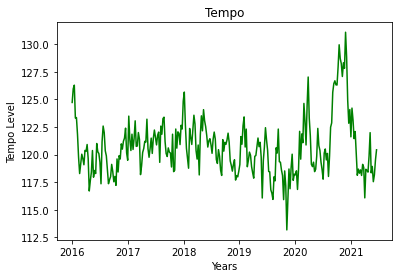

<Figure size 2160x2160 with 0 Axes>

In [21]:
y_axis = weekly_means["tempo"]
plt.plot(dates, y_axis,color='green')
plt.title("Tempo")
plt.xlabel("Years")
plt.ylabel("Tempo Level")
plt.figure(figsize=(30, 30))

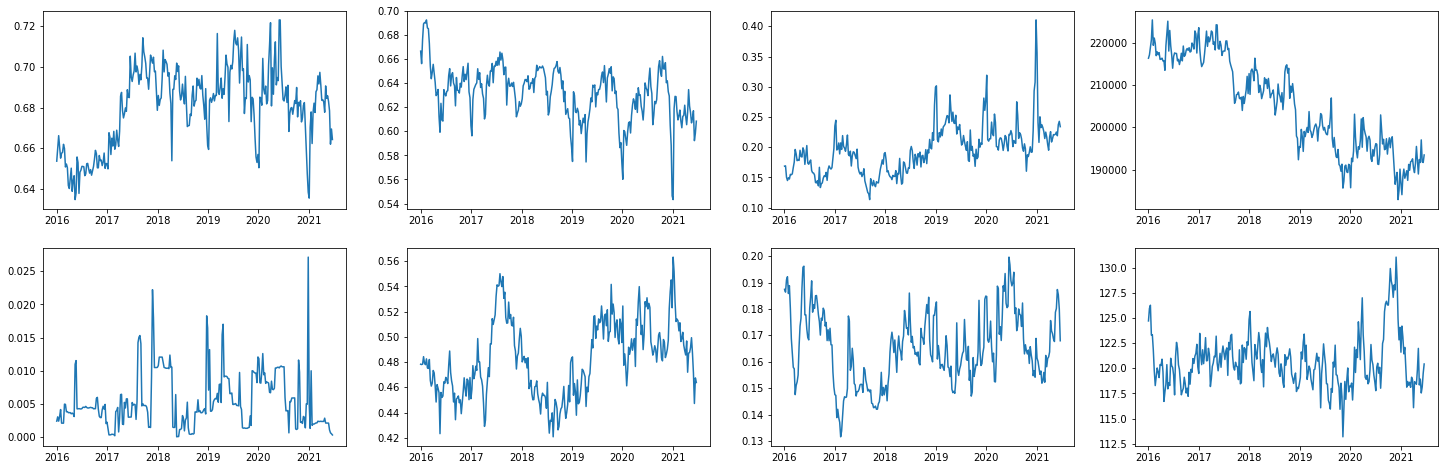

In [22]:
# TODO: add labels and such
fig, (ax1, ax2) = plt.subplots(2, 4)
y_axis = weekly_means["danceability"]
ax1[0].plot(dates, y_axis)
y_axis = weekly_means["energy"]
ax1[1].plot(dates, y_axis)
y_axis = weekly_means["acousticness"]
ax1[2].plot(dates, y_axis)
y_axis = weekly_means["duration_ms"]
ax1[3].plot(dates, y_axis)
y_axis = weekly_means["instrumentalness"]
ax2[0].plot(dates, y_axis)
y_axis = weekly_means["valence"]
ax2[1].plot(dates, y_axis)
y_axis = weekly_means["liveness"]
ax2[2].plot(dates, y_axis)
y_axis = weekly_means["tempo"]
ax2[3].plot(dates, y_axis)
fig.set_size_inches(25, 8)

<Figure size 2160x2160 with 0 Axes>

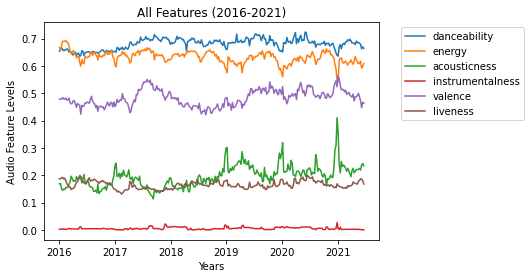

<Figure size 2160x2160 with 0 Axes>

In [23]:
#TODO: add labels or legend, look into spike at end of graph
labels = ["danceability", "energy", "acousticness", "instrumentalness", "valence", "liveness"]
y_axis = weekly_means["danceability"]
plt.plot(dates, y_axis)
y_axis = weekly_means["energy"]
plt.plot(dates, y_axis)
y_axis = weekly_means["acousticness"]
plt.plot(dates, y_axis)
y_axis = weekly_means["instrumentalness"]
plt.plot(dates, y_axis)
y_axis = weekly_means["valence"]
plt.plot(dates, y_axis)
y_axis = weekly_means["liveness"]
plt.plot(dates, y_axis)
plt.title("All Features (2016-2021)")
plt.xlabel("Years")
plt.ylabel("Audio Feature Levels")
plt.legend(labels,bbox_to_anchor=(1.05, 1))

plt.savefig("Figures/All_Features.png",dpi=150)
plt.figure(figsize=(30, 30))

# Seasonality

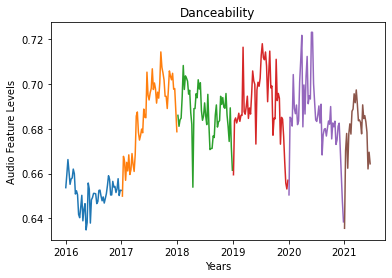

In [24]:

# There always seems to be a drop in danceability of songs at the end of the year

for year in years_df_list:
    groupby_weeks = year.groupby(by="Date")
    weekly_means = groupby_weeks.mean()
    dates = weekly_means.index
    y_axis = weekly_means["danceability"]
    plt.plot(dates, y_axis)
plt.xlabel("Years")
plt.ylabel("Audio Feature Levels")
plt.title("Danceability")
plt.savefig("Figures/Dance_Season.png",dpi=150)


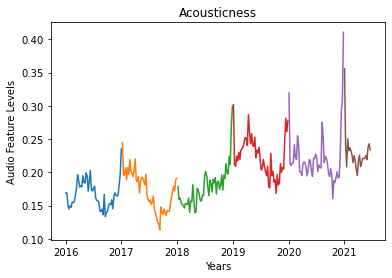

In [25]:

# There always seems to be a spike in acousticness of songs at the end of the year

for year in years_df_list:
    groupby_weeks = year.groupby(by="Date")
    weekly_means = groupby_weeks.mean()
    dates = weekly_means.index
    y_axis = weekly_means["acousticness"]
    plt.plot(dates, y_axis)
plt.xlabel("Years")
plt.ylabel("Audio Feature Levels")
plt.title("Acousticness")
plt.savefig("Figures/Acoustic_Season.png",dpi=150)


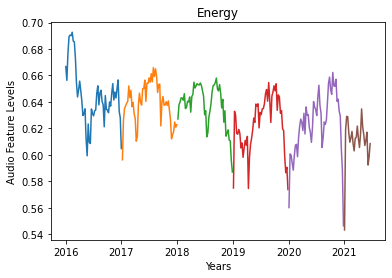

In [26]:

# There always seems to be a drop in energy of songs at the end of the year

for year in years_df_list:
    groupby_weeks = year.groupby(by="Date")
    weekly_means = groupby_weeks.mean()
    dates = weekly_means.index
    y_axis = weekly_means["energy"]
    plt.plot(dates, y_axis)
plt.xlabel("Years")
plt.ylabel("Audio Feature Levels")
plt.title("Energy")
plt.savefig("Figures/Energy_Season.png",dpi=150)


Text(0.5, 1.0, 'Liveness')

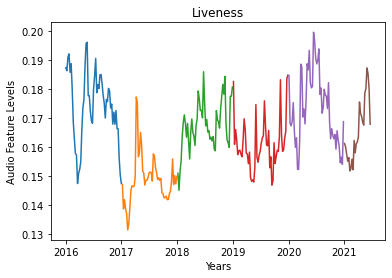

In [27]:
for year in years_df_list:
    groupby_weeks = year.groupby(by="Date")
    weekly_means = groupby_weeks.mean()
    dates = weekly_means.index
    y_axis = weekly_means["liveness"]
    plt.plot(dates, y_axis)
    plt.xlabel("Years")
plt.ylabel("Audio Feature Levels")
plt.title("Liveness")

Text(0.5, 1.0, 'Valence')

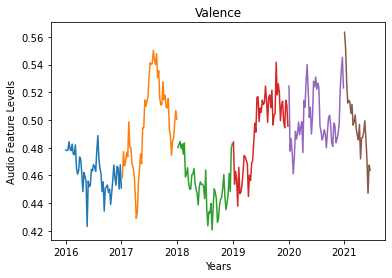

In [28]:
for year in years_df_list:
    groupby_weeks = year.groupby(by="Date")
    weekly_means = groupby_weeks.mean()
    dates = weekly_means.index
    y_axis = weekly_means["valence"]
    plt.plot(dates, y_axis)
plt.xlabel("Years")
plt.ylabel("Audio Feature Levels")
plt.title("Valence")


Text(0.5, 1.0, 'Instrumentalness')

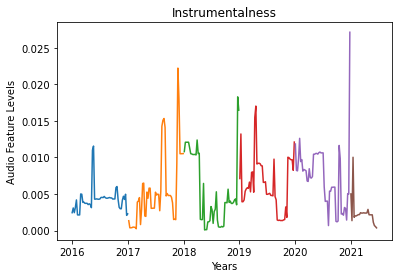

In [29]:
for year in years_df_list:
    groupby_weeks = year.groupby(by="Date")
    weekly_means = groupby_weeks.mean()
    dates = weekly_means.index
    y_axis = weekly_means["instrumentalness"]
    plt.plot(dates, y_axis)
plt.xlabel("Years")
plt.ylabel("Audio Feature Levels")
plt.title("Instrumentalness")


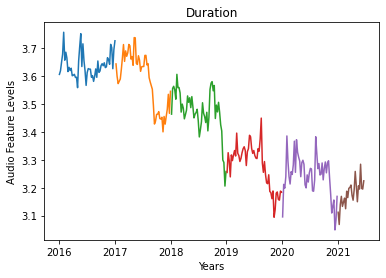

In [30]:
for year in years_df_list:
    groupby_weeks = year.groupby(by="Date")
    weekly_means = groupby_weeks.mean()
    dates = weekly_means.index
    y_axis = weekly_means["duration_ms"]/60000
    plt.plot(dates, y_axis)
    plt.xlabel("Years")
plt.ylabel("Audio Feature Levels")
plt.title("Duration")
plt.savefig("Figures/Duration_Season.png",dpi=150)


#about 3.6minutes down to 3.1... 30second drop in average duration


# Stacked years

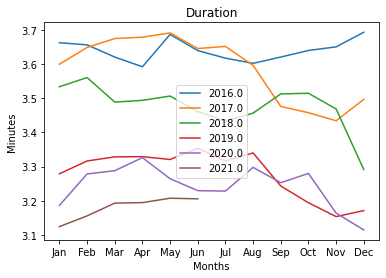

In [31]:
#durations of songs by year
#TODO: convert ms to minute/second, fix legend, 
months = ["Jan", "Feb", "Mar", "Apr", "May","Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for year in years_df_list:
    groupby_month = year.groupby(by="Month")
    monthly_means = groupby_month.mean()
    y_axis = monthly_means["duration_ms"]/60000
    if len(y_axis) == 6:
        months = ["Jan", "Feb", "Mar", "Apr", "May","Jun"]
    plt.plot(months, y_axis, label=year["Year"].mean())
plt.legend()
plt.xlabel("Months")
plt.ylabel("Minutes")
plt.title("Duration")
plt.savefig("Figures/Duration_Stacked.png",dpi=150)

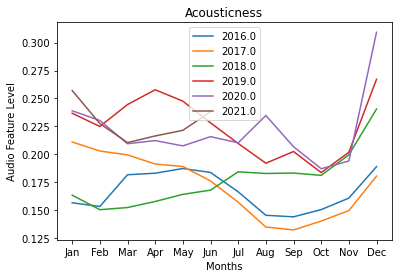

In [32]:
#durations of songs by year
#TODO: convert ms to minute/second, fix legend, 
months = ["Jan", "Feb", "Mar", "Apr", "May","Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for year in years_df_list:
    groupby_month = year.groupby(by="Month")
    monthly_means = groupby_month.mean()
    y_axis = monthly_means["acousticness"]
    if len(y_axis) == 6:
        months = ["Jan", "Feb", "Mar", "Apr", "May","Jun"]
    plt.plot(months, y_axis, label=year["Year"].mean())
plt.legend()
plt.xlabel("Months")
plt.ylabel("Audio Feature Level")
plt.title("Acousticness")
plt.savefig("Figures/Acousticness_Stacked.png",dpi=150)
#gradual increase over the years
#uptick in Dec


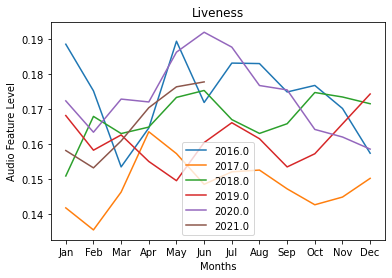

In [33]:
#durations of songs by year
#TODO: convert ms to minute/second, fix legend, 
months = ["Jan", "Feb", "Mar", "Apr", "May","Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for year in years_df_list:
    groupby_month = year.groupby(by="Month")
    monthly_means = groupby_month.mean()
    y_axis = monthly_means["liveness"]
    if len(y_axis) == 6:
        months = ["Jan", "Feb", "Mar", "Apr", "May","Jun"]
    plt.plot(months, y_axis, label=year["Year"].mean())
plt.legend()
plt.xlabel("Months")
plt.ylabel("Audio Feature Level")
plt.title("Liveness")
plt.savefig("Figures/Liveness_Stacked.png",dpi=150)

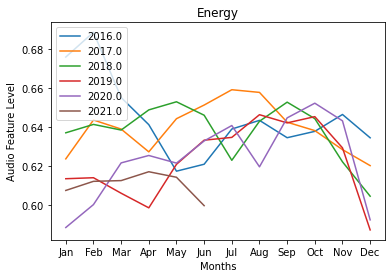

In [34]:
#durations of songs by year
#TODO: convert ms to minute/second, fix legend, 
months = ["Jan", "Feb", "Mar", "Apr", "May","Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for year in years_df_list:
    groupby_month = year.groupby(by="Month")
    monthly_means = groupby_month.mean()
    y_axis = monthly_means["energy"]
    if len(y_axis) == 6:
        months = ["Jan", "Feb", "Mar", "Apr", "May","Jun"]
    plt.plot(months, y_axis, label=year["Year"].mean())
plt.legend()
plt.xlabel("Months")
plt.ylabel("Audio Feature Level")
plt.title("Energy")
plt.savefig("Figures/Energy_Stacked.png",dpi=150)
#downtick in Dec

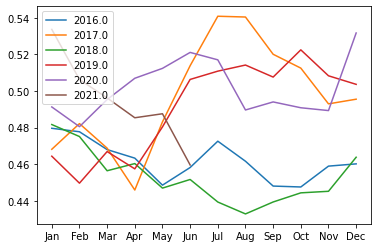

In [35]:
#durations of songs by year
#TODO: convert ms to minute/second, fix legend, 
months = ["Jan", "Feb", "Mar", "Apr", "May","Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for year in years_df_list:
    groupby_month = year.groupby(by="Month")
    monthly_means = groupby_month.mean()
    y_axis = monthly_means["valence"]
    if len(y_axis) == 6:
        months = ["Jan", "Feb", "Mar", "Apr", "May","Jun"]
    plt.plot(months, y_axis, label=year["Year"].mean())
plt.legend()

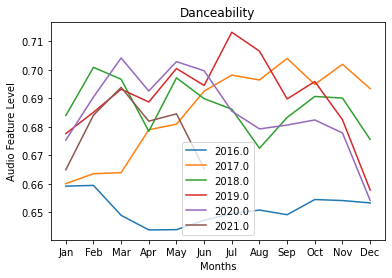

In [36]:
#durations of songs by year
#TODO: convert ms to minute/second, fix legend, 
months = ["Jan", "Feb", "Mar", "Apr", "May","Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for year in years_df_list:
    groupby_month = year.groupby(by="Month")
    monthly_means = groupby_month.mean()
    y_axis = monthly_means["danceability"]
    if len(y_axis) == 6:
        months = ["Jan", "Feb", "Mar", "Apr", "May","Jun"]
    plt.plot(months, y_axis, label=year["Year"].mean())
plt.legend()
plt.xlabel("Months")
plt.ylabel("Audio Feature Level")
plt.title("Danceability")
plt.savefig("Figures/Danceability_Stacked.png",dpi=150)
#downtick in Dec

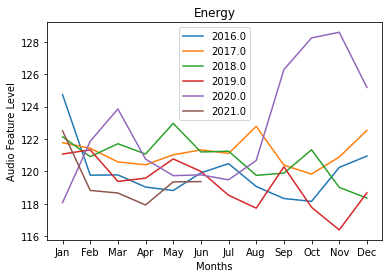

In [37]:
#durations of songs by year
#TODO: convert ms to minute/second, fix legend, 
months = ["Jan", "Feb", "Mar", "Apr", "May","Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for year in years_df_list:
    groupby_month = year.groupby(by="Month")
    monthly_means = groupby_month.mean()
    y_axis = monthly_means["tempo"]
    if len(y_axis) == 6:
        months = ["Jan", "Feb", "Mar", "Apr", "May","Jun"]
    plt.plot(months, y_axis, label=year["Year"].mean())
plt.legend()
plt.xlabel("Months")
plt.ylabel("Audio Feature Level")
plt.title("Energy")
plt.savefig("Figures/Energy_Stacked.png",dpi=150)

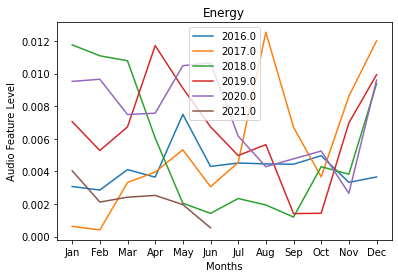

In [38]:
#durations of songs by year
#TODO: convert ms to minute/second, fix legend, 
months = ["Jan", "Feb", "Mar", "Apr", "May","Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for year in years_df_list:
    groupby_month = year.groupby(by="Month")
    monthly_means = groupby_month.mean()
    y_axis = monthly_means["instrumentalness"]
    if len(y_axis) == 6:
        months = ["Jan", "Feb", "Mar", "Apr", "May","Jun"]
    plt.plot(months, y_axis, label=year["Year"].mean())
plt.legend()
plt.xlabel("Months")
plt.ylabel("Audio Feature Level")
plt.title("Energy")
plt.savefig("Figures/Energy_Stacked.png",dpi=150)

# combine above charts in one

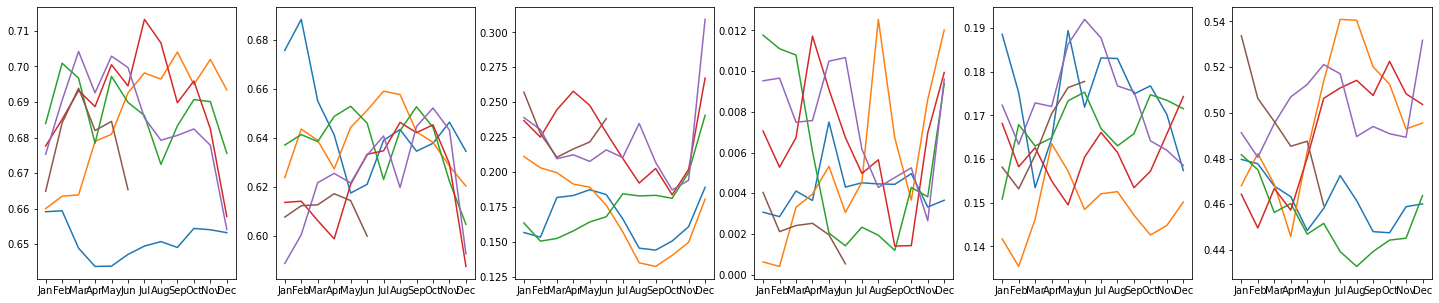

In [39]:
#TODO: formatting, legend
# STATISTICAL ANALYSIS OF DEC MEAN VS ALL OTHER VALUES TO DETERMINE SIGNIFICANCE

audio_feature_list = ["danceability", "energy", "acousticness", "instrumentalness", "liveness", "valence"]

fig, axes = plt.subplots(1,6)
for i in range(len(audio_feature_list)): 
    months = ["Jan", "Feb", "Mar", "Apr", "May","Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    for year in years_df_list:
        groupby_month = year.groupby(by="Month")
        monthly_means = groupby_month.mean()
        y_axis = monthly_means[audio_feature_list[i]]
        if len(y_axis) == 6:
            months = ["Jan", "Feb", "Mar", "Apr", "May","Jun"]
        axes[i].plot(months, y_axis, label=year["Year"].mean())
fig.set_size_inches(25, 5)


# bar charts

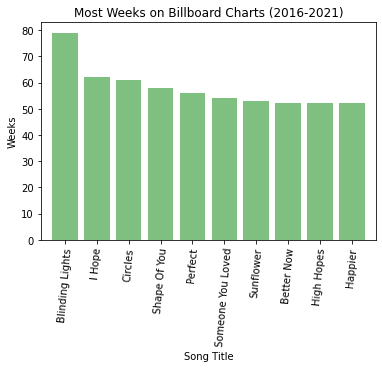

In [40]:
#Most weeks on charts
groupby_artist = merged.groupby(by=["Artist", "Title"])
count_of_songs = groupby_artist["Date"].count()
count_of_songs.sort_values(ascending=False, inplace=True)
top_songs = {"Artist": [], "Title": [], "Count": []}
count = []
artist = []
title = []
#Change range for close up of top x
for i in range(10):
    top_songs["Count"].append(count_of_songs[i])
    top_songs["Artist"].append(count_of_songs.index[i][0])
    top_songs["Title"].append(count_of_songs.index[i][1])

top_songs_df = pd.DataFrame(top_songs)
plt.bar(top_songs_df["Title"], top_songs_df["Count"], color = 'g', alpha=0.5,align='center')
x_axis = np.arange(len(top_songs_df))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Blinding Lights", "I Hope", "Circles", "Shape Of You", "Perfect",
       "Someone You Loved", "Sunflower", "Better Now",
       "High Hopes", "Happier"], rotation = 85)

plt.xlim(-0.75, len(x_axis)-0.25) 
plt.xlabel("Song Title")
plt.ylabel("Weeks")
plt.title("Most Weeks on Billboard Charts (2016-2021)")
plt.savefig("Figures/Top_Songs.png",dpi=150)
# The Weeknd's Blinding Lights had the longest run by far (~30% longer than 2nd place)

In [41]:
top_songs_df["Title"], top_songs_df["Count"]

(0                                  Blinding Lights
 1                                           I Hope
 2                                          Circles
 3                                     Shape Of You
 4                                          Perfect
 5                                Someone You Loved
 6    Sunflower (Spider-Man: Into The Spider-Verse)
 7                                       Better Now
 8                                       High Hopes
 9                                          Happier
 Name: Title, dtype: object,
 0    79
 1    62
 2    61
 3    58
 4    56
 5    54
 6    53
 7    52
 8    52
 9    52
 Name: Count, dtype: int64)